In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import os

In [33]:
folder = 'data'
data_set = pd.DataFrame()

for activity_folder in os.listdir(folder):
    activity_path = os.path.join(folder, activity_folder)
    if not os.path.isdir(activity_path):
        continue

    for file in os.listdir(activity_path):
        file_path = os.path.join(activity_path, file)
        if not file.endswith('.csv'):
            continue
        
        df = pd.read_csv(file_path)
        df['activity'] = activity_folder
        data_set = pd.concat([data_set, df], ignore_index=True)

data_set

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,11.353305,25.656265,16.002844,running
1,14.183250,4.194642,4.912902,running
2,28.213272,30.056808,12.440272,running
3,2.341529,16.041151,-3.184288,running
4,15.744270,-12.737153,-8.954314,running
...,...,...,...,...
193855,0.277727,-0.057461,9.811439,idle
193856,0.248997,-0.033519,9.753978,idle
193857,0.225055,-0.052672,9.768343,idle
193858,0.239420,-0.052672,9.753978,idle


In [34]:
data_set.dtypes

accelerometer_X    float64
accelerometer_Y    float64
accelerometer_Z    float64
activity            object
dtype: object

In [35]:
data_set.isnull().sum()

accelerometer_X    0
accelerometer_Y    0
accelerometer_Z    0
activity           0
dtype: int64

In [36]:
features = ['accelerometer_X',	'accelerometer_Y',	'accelerometer_Z']

In [37]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_set[features])

norm_data = data_set.copy()
norm_data[features] = normalized_data
norm_data

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,1.121943,1.928644,1.974248,running
1,1.458647,0.208137,0.432173,running
2,3.127925,2.281421,1.478867,running
3,0.049731,1.157832,-0.693754,running
4,1.644375,-1.149229,-1.496086,running
...,...,...,...,...
193855,-0.195818,-0.132740,1.113323,idle
193856,-0.199237,-0.130821,1.105333,idle
193857,-0.202085,-0.132356,1.107331,idle
193858,-0.200376,-0.132356,1.105333,idle


In [38]:
X_train, X_test, y_train, y_test = train_test_split(norm_data[features], norm_data['activity'], test_size=0.3, stratify=norm_data['activity'])

In [39]:
%%time

model_svm = SVC()
model_svm.fit(X_train, y_train)

CPU times: user 3min 4s, sys: 165 ms, total: 3min 4s
Wall time: 3min 5s


SVC()

In [40]:
%%time

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

CPU times: user 11.4 s, sys: 6.61 ms, total: 11.4 s
Wall time: 11.4 s


RandomForestClassifier()

In [41]:
score_svm = model_svm.score(X_test, y_test)
score_rf = model_rf.score(X_test, y_test)

print("Точність моделі SVM:", score_svm)
print("Точність моделі Random Forest:", score_rf)

Точність моделі SVM: 0.8922418239966986
Точність моделі Random Forest: 0.9995701365246398


In [42]:
y_pred_svm = model_svm.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

In [43]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

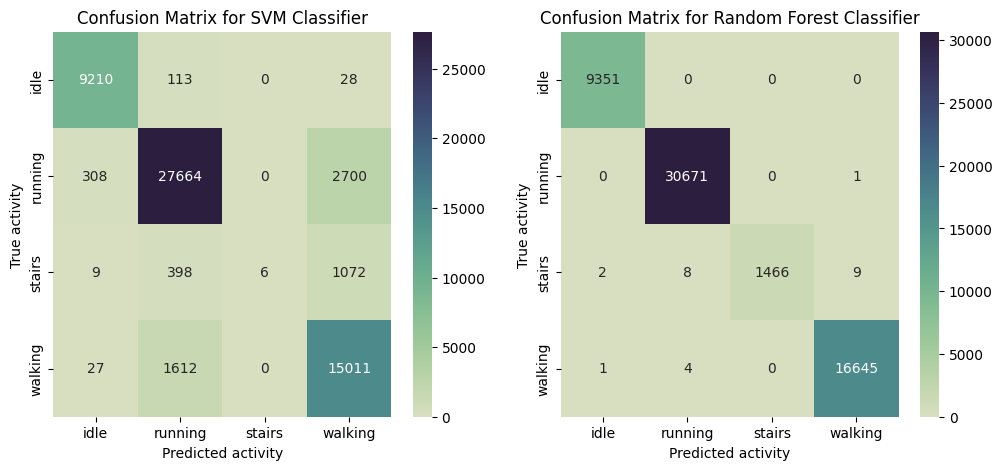

In [61]:
figure, axes = plt.subplots(1, 2, figsize=(12, 5))

classifiers = ["SVM", "Random Forest"]
confusion_matrices = [conf_matrix_svm, conf_matrix_rf]
activities = ['idle', 'running', 'stairs', 'walking']
custom_cmap = sns.color_palette("ch:s=.5,r=-.75", as_cmap=True)

for i, classifier in enumerate(classifiers):
    sns.heatmap(
        confusion_matrices[i],
        annot=True,
        fmt='d',
        cmap=custom_cmap,
        xticklabels=activities,
        yticklabels=activities,
        ax=axes[i],
    )
  
    axes[i].set_title(f"Confusion Matrix for {classifier} Classifier")
    axes[i].set_xlabel("Predicted activity")
    axes[i].set_ylabel("True activity")

plt.show()